# Revisió i possible transformació sobre les dades dels APs

En aquest script es revisarà la base de dades dels accespoints i es mirarà si s'ha de realitzar un procés de transformació de les dades per si s'ha d'eliminar possibles errors.
El primer pas serà donar un cop d'ull a les dades.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('accesspoints.csv')

In [3]:
df.head()

,Unnamed: 0,mac,name,lat,lng,zona
0,1,88:15:44:2c:29:20,Gat. Paseo Marítimo - Darsena,39.568522,2.635078,SmartWiFiPalma Zona 0
1,2,88:15:44:2c:44:80,Gat. RCNP,39.566586,2.638249,SmartWiFiPalma Zona 0
2,3,e0:55:3d:10:07:9e,Gat. Plaza Juan Carlos I,39.571363,2.647172,SmartWiFiPalma Zona 0
3,4,00:18:0a:04:73:62,Gat. Catedral - Parlament,39.568979,2.649171,SmartWiFiPalma Zona 2
4,5,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0


Com s'observa cada direcció mac conté un nom que l'identifica, la posició i una zona concreta del mapa.
Una vegada vist la capçalera de les dades. Es posarà a visualitzar els punts sobre el mapa de Palma de Mallorca.

In [4]:
BBox = ((df.lng.min(),df.lng.max(), df.lat.min(), df.lat.max()))
BBox

(2.6235454995185097, 2.66592666506767, 39.5472882813117, 39.5759175790653)

In [5]:
ruh_m = plt.imread('palma_de_mallorca.png')

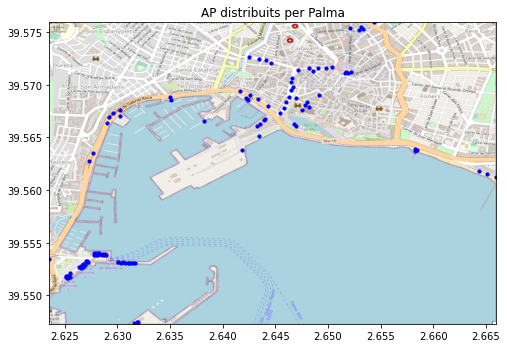

In [6]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.lng, df.lat, zorder=1, alpha= 1, c='b', s=10 )
ax.set_title('AP distribuits per Palma')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Una vegada vist els diferents APs, es realitzarà una visualització segons la seva zona.

In [7]:
df.zona0 = df[  (df['zona'] == 'SmartWiFiPalma Zona 0')] 
df.zona1 = df[  (df['zona'] == 'SmartWiFiPalma Zona 1')] 
df.zona2 = df[  (df['zona'] == 'SmartWiFiPalma Zona 2')] 
df.zona3 = df[  (df['zona'] == 'SmartWiFiPalma Zona 3')] 
df.zona4 = df[  (df['zona'] == 'SmartWiFiPalma Zona 4')] 
df.zona5 = df[  (df['zona'] == 'SmartWiFiPalma Zona 5')] 
df.zona6 = df[  (df['zona'] == 'SmartWiFiPalma Zona 6')] 
df.zona7 = df[  (df['zona'] == 'SmartWiFiPalma Zona 7')] 


<ipython-input-7-a5942c1fc609>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona0 = df[  (df['zona'] == 'SmartWiFiPalma Zona 0')]
<ipython-input-7-a5942c1fc609>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona1 = df[  (df['zona'] == 'SmartWiFiPalma Zona 1')]
<ipython-input-7-a5942c1fc609>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona2 = df[  (df['zona'] == 'SmartWiFiPalma Zona 2')]
<ipython-input-7-a5942c1fc609>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona3 = df[  (df['zona'] == 'S

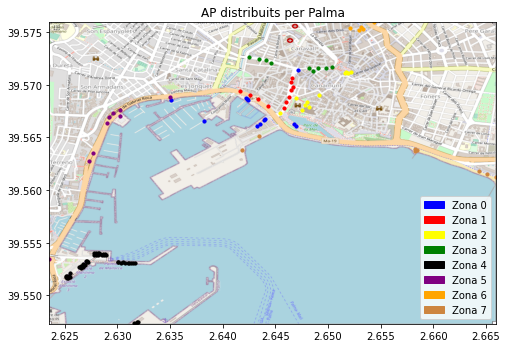

In [8]:
fig, ax = plt.subplots(figsize = (8,7))

# Pintar els punts segons la zona on han estat
ax.scatter(df.zona0.lng, df.zona0.lat, zorder=1, alpha= 1, c='b', s=10 )
ax.scatter(df.zona1.lng, df.zona1.lat, zorder=1, alpha= 1, c='red', s=10 )
ax.scatter(df.zona2.lng, df.zona2.lat, zorder=1, alpha= 1, c='yellow', s=10 )
ax.scatter(df.zona3.lng, df.zona3.lat, zorder=1, alpha= 1, c='green', s=10 )
ax.scatter(df.zona4.lng, df.zona4.lat, zorder=1, alpha= 1, c='black', s=10 )
ax.scatter(df.zona5.lng, df.zona5.lat, zorder=1, alpha= 1, c='purple', s=10 )
ax.scatter(df.zona6.lng, df.zona6.lat, zorder=1, alpha= 1, c='orange', s=10 )
ax.scatter(df.zona7.lng, df.zona7.lat, zorder=1, alpha= 1, c='peru', s=10 )
ax.set_title('AP distribuits per Palma')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# Plot de la llegenda
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
blue_patch = mpatches.Patch(color='blue', label='Zona 0')
red_patch = mpatches.Patch(color='red', label='Zona 1')
yellow_patch = mpatches.Patch(color='yellow', label='Zona 2')
green_patch = mpatches.Patch(color='green', label='Zona 3')
black_patch = mpatches.Patch(color='black', label='Zona 4')
purple_patch = mpatches.Patch(color='purple', label='Zona 5')
orange_patch = mpatches.Patch(color='orange', label='Zona 6')
peru_match = mpatches.Patch(color='peru', label='Zona 7')
plt.legend(handles=[blue_patch, red_patch,yellow_patch, green_patch,black_patch, purple_patch, orange_patch, peru_match], loc='lower right')

Com es pot observar els punts d'accés no estan ben definides a dins les zones, ja que hi ha una gran zona que poden ser dividides o que es podrien considerar un altra zona. A causa d'aquest fet es realitzaran dues accions:
- Afegir noves zones per no tenir una àrea tant amplia.
- Canviar la posició d'APs a altres zones més apropiades.

## Creació de noves zones

In [9]:
df.zona2 

,Unnamed: 0,mac,name,lat,lng,zona
3,4,00:18:0a:04:73:62,Gat. Catedral - Parlament,39.568979,2.649171,SmartWiFiPalma Zona 2
8,9,88:15:44:2c:19:90,Gat. Antoni Maura - Enco,39.567292,2.645429,SmartWiFiPalma Zona 2
32,33,88:15:44:2c:13:00,Gat. Catedral - Plaça de la Seu,39.568060,2.647795,SmartWiFiPalma Zona 2
37,38,88:15:44:59:0f:c0,Gat. Catedral - Costa de la Seu***,39.568382,2.647994,SmartWiFiPalma Zona 2
38,39,88:15:44:59:3c:00,Gat. Catedral - Museo Catedral,39.567852,2.648177,SmartWiFiPalma Zona 2
39,40,88:15:44:2c:02:00,Gat. Catedral - Palacio Real La Almudaina,39.567604,2.647521,SmartWiFiPalma Zona 2
40,41,88:15:44:2d:3f:b4,Gat. Plaza de la Reina - Cappuccino,39.568753,2.647008,SmartWiFiPalma Zona 2
41,42,00:18:0a:03:0d:f8,Gat. Plaza Mayor - Calle Sindicato,39.571161,2.652222,SmartWiFiPalma Zona 2
42,43,88:15:44:2d:40:66,Gat. Plaza Mayor - Cafetería Paris***,39.571183,2.651676,SmartWiFiPalma Zona 2
43,44,00:18:0a:03:0f:b0,Gat. Plaza Mayor - Plaça del Marqués del Palmer,39.571104,2.651602,SmartWiFiPalma Zona 2


In [10]:
df.zona8 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])

for indice_fila, fila  in df.zona2.iterrows(): #Creació de la zona 8 a partir de les dades de la zona 2
    if "Gat. Plaza Mayor" in fila["name"]:
        new_list = [ (fila['Unnamed: 0'], fila['mac'], fila['name'], fila['lat'], fila['lng'], "SmartWiFiPalma Zona 8" )]
        dfNew=pd.DataFrame(new_list, columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])
        df.zona8 = df.zona8.append( dfNew, ignore_index=True)
        df.zona2 = df.zona2.drop([indice_fila],axis=0)
        

<ipython-input-10-86c2d0694072>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona8 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])


In [11]:
df.zona8

,Unnamed: 0,mac,name,lat,lng,zona
0,42,00:18:0a:03:0d:f8,Gat. Plaza Mayor - Calle Sindicato,39.571161,2.652222,SmartWiFiPalma Zona 8
1,43,88:15:44:2d:40:66,Gat. Plaza Mayor - Cafetería Paris***,39.571183,2.651676,SmartWiFiPalma Zona 8
2,44,00:18:0a:03:0f:b0,Gat. Plaza Mayor - Plaça del Marqués del Palmer,39.571104,2.651602,SmartWiFiPalma Zona 8
3,45,88:15:44:2d:41:60,Gat. Plaza Mayor - Lizarran,39.571125,2.651903,SmartWiFiPalma Zona 8


In [12]:
df.zona5

,Unnamed: 0,mac,name,lat,lng,zona
54,55,88:15:44:2c:26:80,Gat. Paseo Marítimo - Cappuccino,39.568843,2.634958,SmartWiFiPalma Zona 5
55,56,00:18:0a:04:74:d0,Gat. Paseo Maritimo - Restaurante The Boat Hou...,39.567063,2.630230,SmartWiFiPalma Zona 5
56,57,88:15:44:2c:30:00,Gat. Paseo Maritimo - Palma on Bike,39.567614,2.630239,SmartWiFiPalma Zona 5
57,58,00:18:0a:03:04:bc,Gat. Paseo Maritimo - Europcar,39.566885,2.629192,SmartWiFiPalma Zona 5
58,59,88:15:44:2c:13:d0,Gat. Paseo Maritimo - La Caixa / Maritimo 21,39.566366,2.628978,SmartWiFiPalma Zona 5
59,60,88:15:44:2c:34:10,Gat. Paseo Maritimo - Discoteca Tito's,39.562772,2.627284,SmartWiFiPalma Zona 5
60,61,88:15:44:2c:0f:60,Gat. Paseo Maritimo - Hotel Gran Melia Victoria,39.563531,2.627674,SmartWiFiPalma Zona 5
61,62,88:15:44:2c:3b:a0,Gat. Paseo Maritimo - Plaza Marc Ferragut,39.567265,2.629619,SmartWiFiPalma Zona 5
96,97,88:15:44:2c:2b:50,Gat. Paseo Maritimo - Bar Templo,39.553474,2.623545,SmartWiFiPalma Zona 5


In [13]:
df.zona0

,Unnamed: 0,mac,name,lat,lng,zona
0,1,88:15:44:2c:29:20,Gat. Paseo Marítimo - Darsena,39.568522,2.635078,SmartWiFiPalma Zona 0
1,2,88:15:44:2c:44:80,Gat. RCNP,39.566586,2.638249,SmartWiFiPalma Zona 0
2,3,e0:55:3d:10:07:9e,Gat. Plaza Juan Carlos I,39.571363,2.647172,SmartWiFiPalma Zona 0
4,5,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0
5,6,00:18:0a:04:a1:ca,Mar de Nudos - Gat. Mar de Nudos,39.566653,2.643939,SmartWiFiPalma Zona 0
6,7,00:18:0a:04:73:96,Gat. The Guinness House - Catedral,39.566103,2.646997,SmartWiFiPalma Zona 0
7,8,00:18:0a:04:43:3e,Gat. The Guinness House - Almudaina,39.566242,2.646798,SmartWiFiPalma Zona 0
33,34,00:18:0a:22:b8:ef,Gat. Pesquero,39.568632,2.642304,SmartWiFiPalma Zona 0
34,35,00:18:0a:03:0d:28,Gat. Azotea Terraza Pesquero,39.568576,2.642401,SmartWiFiPalma Zona 0
35,36,00:18:0a:03:12:32,Gat. Azotea Pesquero - Paseo Sagrera / Lonja,39.568727,2.642188,SmartWiFiPalma Zona 0


In [14]:
df.zona3

,Unnamed: 0,mac,name,lat,lng,zona
45,46,00:18:0a:03:11:de,Gat. Plaça del Mercat - Alaska,39.571564,2.649014,SmartWiFiPalma Zona 3
46,47,00:18:0a:03:13:18,Gat. Plaça del Mercat - Teatro Principal,39.571634,2.650395,SmartWiFiPalma Zona 3
47,48,00:18:0a:03:0d:82,Gat. Plaça del Mercat - Restaurante Tirso,39.571300,2.648614,SmartWiFiPalma Zona 3
48,49,00:18:0a:03:0c:fc,Gat. Plaça del Mercat - Plaça Weyler,39.571601,2.649850,SmartWiFiPalma Zona 3
49,50,88:15:44:59:66:30,Gat. Plaça del Mercat - Nespresso,39.571574,2.648217,SmartWiFiPalma Zona 3
50,51,88:15:44:2c:17:50,Gat. Jaime lll - Calle Bonaire,39.572056,2.644597,SmartWiFiPalma Zona 3
51,52,88:15:44:2c:39:00,Gat. Jaime lll - Passeig Mallorca,39.572581,2.642466,SmartWiFiPalma Zona 3
52,53,88:15:44:58:fd:a0,Gat. Jaime lll - Cafetería Es Rebost,39.572422,2.643419,SmartWiFiPalma Zona 3
53,54,88:15:44:2c:17:c0,Gat. Jaime lll - El Corte Inglés,39.572312,2.644078,SmartWiFiPalma Zona 3


In [15]:
df.zona9 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])

for indice_fila, fila  in df.zona3.iterrows(): #Creació de una nova zona a partir de la tercera
    if "Gat. Jaime lll" in fila["name"]:
        new_list = [ (fila['Unnamed: 0'], fila['mac'], fila['name'], fila['lat'], fila['lng'], "SmartWiFiPalma Zona 9" )]
        dfNew=pd.DataFrame(new_list, columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])
        df.zona9 = df.zona9.append( dfNew, ignore_index=True)
        df.zona3 = df.zona3.drop([indice_fila],axis=0)

<ipython-input-15-b3605da6aae7>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona9 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])


In [16]:
df.zona9

,Unnamed: 0,mac,name,lat,lng,zona
0,51,88:15:44:2c:17:50,Gat. Jaime lll - Calle Bonaire,39.572056,2.644597,SmartWiFiPalma Zona 9
1,52,88:15:44:2c:39:00,Gat. Jaime lll - Passeig Mallorca,39.572581,2.642466,SmartWiFiPalma Zona 9
2,53,88:15:44:58:fd:a0,Gat. Jaime lll - Cafetería Es Rebost,39.572422,2.643419,SmartWiFiPalma Zona 9
3,54,88:15:44:2c:17:c0,Gat. Jaime lll - El Corte Inglés,39.572312,2.644078,SmartWiFiPalma Zona 9


In [17]:
#La zona 1 es pot dividir en dues zones diferents
df.zona1

,Unnamed: 0,mac,name,lat,lng,zona
22,23,00:18:0a:5b:60:e0,Gat. Antoni Maura - Lennox Pub**,39.567815,2.645783,SmartWiFiPalma Zona 1
23,24,88:15:44:2c:1d:c0,Gat. Antoni Maura - Hugo Boss,39.568794,2.646268,SmartWiFiPalma Zona 1
24,25,00:18:0a:5b:86:a0,Gat. Antoni Maura - Palma on Bike,39.568303,2.646056,SmartWiFiPalma Zona 1
25,26,00:18:0a:04:37:46,Gat. Paseo Sagrera La Lonja,39.568009,2.644322,SmartWiFiPalma Zona 1
26,27,00:18:0a:5b:31:90,Gat. Paseo del Born - Louis Vuitton,39.569789,2.646638,SmartWiFiPalma Zona 1
27,28,00:18:0a:5b:33:00,Gat. Paseo del Born - Leonas**,39.569449,2.646461,SmartWiFiPalma Zona 1
28,29,00:18:0a:5b:a6:c0,Gat. Paseo del Born 22 - Zara,39.570660,2.646600,SmartWiFiPalma Zona 1
29,30,00:18:0a:5b:a9:90,Gat. Paseo del Born - Massimo Dutti,39.570222,2.646520,SmartWiFiPalma Zona 1
30,31,00:18:0a:04:75:4e,Gat. Paseo Sagrera - Consulat del Mar***,39.568589,2.643371,SmartWiFiPalma Zona 1
31,32,00:18:0a:03:12:20,Gat. Paseo Sagrera - Lonja Pesquera,39.569349,2.641647,SmartWiFiPalma Zona 1


In [18]:
df.zona10 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])

for indice_fila, fila  in df.zona1.iterrows():
    if "Paseo Sagrera" in fila["name"]:
        new_list = [ (fila['Unnamed: 0'], fila['mac'], fila['name'], fila['lat'], fila['lng'], "SmartWiFiPalma Zona 10" )]
        dfNew=pd.DataFrame(new_list, columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])
        df.zona10 = df.zona10.append( dfNew, ignore_index=True)
        df.zona1 = df.zona1.drop([indice_fila],axis=0)
df.zona10

<ipython-input-18-468a66ad5b09>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona10 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])


,Unnamed: 0,mac,name,lat,lng,zona
0,26,00:18:0a:04:37:46,Gat. Paseo Sagrera La Lonja,39.568009,2.644322,SmartWiFiPalma Zona 10
1,31,00:18:0a:04:75:4e,Gat. Paseo Sagrera - Consulat del Mar***,39.568589,2.643371,SmartWiFiPalma Zona 10
2,32,00:18:0a:03:12:20,Gat. Paseo Sagrera - Lonja Pesquera,39.569349,2.641647,SmartWiFiPalma Zona 10
3,37,88:15:44:2d:40:e4,Gat. Paseo Sagrera - Pesquero,39.569052,2.642630,SmartWiFiPalma Zona 10


In [19]:
df.zona11 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])

for indice_fila, fila  in df.zona0.iterrows():
    if "The Guinness House" in fila["name"]:
        new_list = [ (fila['Unnamed: 0'], fila['mac'], fila['name'], fila['lat'], fila['lng'], "SmartWiFiPalma Zona 11" )]
        dfNew=pd.DataFrame(new_list, columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])
        df.zona11 = df.zona11.append( dfNew, ignore_index=True)
        df.zona0 = df.zona0.drop([indice_fila],axis=0)
df.zona11

<ipython-input-19-e5ba73b1a928>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.zona11 = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona'])


,Unnamed: 0,mac,name,lat,lng,zona
0,7,00:18:0a:04:73:96,Gat. The Guinness House - Catedral,39.566103,2.646997,SmartWiFiPalma Zona 11
1,8,00:18:0a:04:43:3e,Gat. The Guinness House - Almudaina,39.566242,2.646798,SmartWiFiPalma Zona 11


In [20]:
df.zona0

,Unnamed: 0,mac,name,lat,lng,zona
0,1,88:15:44:2c:29:20,Gat. Paseo Marítimo - Darsena,39.568522,2.635078,SmartWiFiPalma Zona 0
1,2,88:15:44:2c:44:80,Gat. RCNP,39.566586,2.638249,SmartWiFiPalma Zona 0
2,3,e0:55:3d:10:07:9e,Gat. Plaza Juan Carlos I,39.571363,2.647172,SmartWiFiPalma Zona 0
4,5,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0
5,6,00:18:0a:04:a1:ca,Mar de Nudos - Gat. Mar de Nudos,39.566653,2.643939,SmartWiFiPalma Zona 0
33,34,00:18:0a:22:b8:ef,Gat. Pesquero,39.568632,2.642304,SmartWiFiPalma Zona 0
34,35,00:18:0a:03:0d:28,Gat. Azotea Terraza Pesquero,39.568576,2.642401,SmartWiFiPalma Zona 0
35,36,00:18:0a:03:12:32,Gat. Azotea Pesquero - Paseo Sagrera / Lonja,39.568727,2.642188,SmartWiFiPalma Zona 0
68,69,00:18:0a:03:12:1a,Gat. Moll Vell - Amarres,39.566083,2.643238,SmartWiFiPalma Zona 0
69,70,88:15:44:2c:34:60,Gat. Moll Vell - Restaurante Port Blanc,39.566233,2.643587,SmartWiFiPalma Zona 0


### Punts esporàdics

In [21]:
#Hi ha un punt a la zona 2 que ha d'anar a la zona 1 per la seva ubicació
df.zona1 = df.zona1.append( df.zona2[ (df.zona2['name'] == "Gat. Antoni Maura - Enco")])
df.zona1 = df.zona1.replace({"SmartWiFiPalma Zona 2": "SmartWiFiPalma Zona 1"})
df.zona2 = df.zona2[df.zona2['name'] != "Gat. Antoni Maura - Enco"]

#És pot observar que hi ha un punt a la zona 0 que es pot considerar de la zona3, així que és cambiará
df.zona3 = df.zona3.append( df.zona0[ (df.zona0['name'] == "Gat. Plaza Juan Carlos I")])
df.zona3 = df.zona3.replace({"SmartWiFiPalma Zona 0": "SmartWiFiPalma Zona 3"})
df.zona0 = df.zona0[df.zona0['name'] != "Gat. Plaza Juan Carlos I"]

#Un punt de la zona 0 ha d'anar a la zona 5

df.zona5 = df.zona5.append( df.zona0[ (df.zona0['name'] == "Gat. Paseo Marítimo - Darsena")])
df.zona5 = df.zona5.replace({"SmartWiFiPalma Zona 0": "SmartWiFiPalma Zona 5"})
df.zona0 = df.zona0[df.zona0['name'] != "Gat. Paseo Marítimo - Darsena"]

df.zona5 = df.zona5.append( df.zona0[ (df.zona0['name'] == "Gat. RCNP")])
df.zona5 = df.zona5.replace({"SmartWiFiPalma Zona 0": "SmartWiFiPalma Zona 5"})
df.zona0 = df.zona0[df.zona0['name'] != "Gat. RCNP"]


#Afegir dos punts de la zona 0 a la zona 10
df.zona10 = df.zona10.append(df.zona0[ (df.zona0['name'] == "Gat. Pesquero")])
df.zona10 = df.zona10.append(df.zona0[ (df.zona0['name'] == "Gat. Azotea Terraza Pesquero")])
df.zona10 = df.zona10.append(df.zona0[ (df.zona0['name'] == "Gat. Azotea Pesquero - Paseo Sagrera / Lonja")])
df.zona10 = df.zona10.replace({"SmartWiFiPalma Zona 0": "SmartWiFiPalma Zona 10"})
df.zona0 = df.zona0[df.zona0['name'] != "Gat. Pesquero"]
df.zona0 = df.zona0[df.zona0['name'] != "Gat. Azotea Terraza Pesquero"]
df.zona0 = df.zona0[df.zona0['name'] != "Gat. Azotea Pesquero - Paseo Sagrera / Lonja"]

#Afegir dos punts de la zona7 a la zona0
df.zona0 = df.zona0.append(df.zona7[ (df.zona7['name'] == "Gat. Varadero Parada Autobuses")])
df.zona0 = df.zona0.append(df.zona7[ (df.zona7['name'] == "Gat. Varadero")])
df.zona0 = df.zona0.replace({"SmartWiFiPalma Zona 7": "SmartWiFiPalma Zona 0"})
df.zona7 = df.zona7[df.zona7['name'] != "Gat. Varadero Parada Autobuses"]
df.zona7 = df.zona7[df.zona7['name'] != "Gat. Varadero"]

In [22]:
df.zona4

,Unnamed: 0,mac,name,lat,lng,zona
9,10,00:18:0a:50:88:a4,Gat. EM1 Embarque 11,39.553072,2.631665,SmartWiFiPalma Zona 4
10,11,00:18:0a:51:32:57,Gat. EM1 Embarque 6,39.553115,2.630495,SmartWiFiPalma Zona 4
11,12,00:18:0a:51:3b:bc,Gat. EM1 Embarque 9,39.553090,2.631155,SmartWiFiPalma Zona 4
12,13,00:18:0a:50:2f:5b,Gat. EM4 Facturacion - Mostrador 2,39.553924,2.628618,SmartWiFiPalma Zona 4
13,14,00:18:0a:50:a9:6e,Gat. EM4 Facturacion - Rack,39.553789,2.628518,SmartWiFiPalma Zona 4
14,15,00:18:0a:50:29:a5,Gat. EM2 Embarque 2B - Tiendas,39.553152,2.627184,SmartWiFiPalma Zona 4
15,16,00:18:0a:51:3b:d6,Gat. EM2 Embarque 2A - Centro,39.552684,2.626725,SmartWiFiPalma Zona 4
16,17,00:18:0a:50:8b:7b,Gat. EM2 Sala de Espera Recogida de Equipaje,39.553229,2.627077,SmartWiFiPalma Zona 4
17,18,00:18:0a:50:7c:4a,Gat. EM2 Embarque 2C - Dutty Free,39.553263,2.627038,SmartWiFiPalma Zona 4
18,19,00:18:0a:50:ac:be,Gat. EM3 Planta Baja - Sala de Espera,39.551598,2.625226,SmartWiFiPalma Zona 4


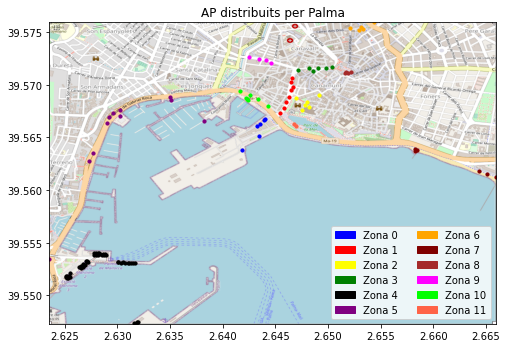

In [23]:
fig, ax = plt.subplots(figsize = (8,7))

# Pintar els punts segons la zona on han estat
ax.scatter(df.zona0.lng, df.zona0.lat, zorder=1, alpha= 1, c='b', s=10 )
ax.scatter(df.zona1.lng, df.zona1.lat, zorder=1, alpha= 1, c='red', s=10 )
ax.scatter(df.zona2.lng, df.zona2.lat, zorder=1, alpha= 1, c='yellow', s=10 )
ax.scatter(df.zona3.lng, df.zona3.lat, zorder=1, alpha= 1, c='green', s=10 )
ax.scatter(df.zona4.lng, df.zona4.lat, zorder=1, alpha= 1, c='black', s=10 )
ax.scatter(df.zona5.lng, df.zona5.lat, zorder=1, alpha= 1, c='purple', s=10 )
ax.scatter(df.zona6.lng, df.zona6.lat, zorder=1, alpha= 1, c='orange', s=10 )
ax.scatter(df.zona7.lng, df.zona7.lat, zorder=1, alpha= 1, c='maroon', s=10 )
ax.scatter(df.zona8.lng, df.zona8.lat, zorder=1, alpha= 1, c='brown', s=10 )
ax.scatter(df.zona9.lng, df.zona9.lat, zorder=1, alpha= 1, c='fuchsia', s=10 )
ax.scatter(df.zona10.lng, df.zona10.lat, zorder=1, alpha= 1, c='lime', s=10 )
ax.scatter(df.zona11.lng, df.zona11.lat, zorder=1, alpha= 1, c='tomato', s=10 )
ax.set_title('AP distribuits per Palma')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# Plot de la llegenda
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
blue_patch = mpatches.Patch(color='blue', label='Zona 0')
red_patch = mpatches.Patch(color='red', label='Zona 1')
yellow_patch = mpatches.Patch(color='yellow', label='Zona 2')
green_patch = mpatches.Patch(color='green', label='Zona 3')
black_patch = mpatches.Patch(color='black', label='Zona 4')
purple_patch = mpatches.Patch(color='purple', label='Zona 5')
orange_patch = mpatches.Patch(color='orange', label='Zona 6')
khaki_match = mpatches.Patch(color='maroon', label='Zona 7')
brown_match = mpatches.Patch(color='brown', label='Zona 8')
fuchsia_match = mpatches.Patch(color='fuchsia', label='Zona 9')
lime_match = mpatches.Patch(color='lime', label='Zona 10')
tomato_match = mpatches.Patch(color='tomato', label='Zona 11')

plt.legend(handles=[blue_patch, red_patch,yellow_patch, green_patch,black_patch, purple_patch, orange_patch, khaki_match, brown_match, fuchsia_match, lime_match, tomato_match], loc='lower right',ncol=2)

Es pot observar que a l'haver canviat els diferents APs i creat les noves zones la seva classificació té millor sentit. A causa de les diferents zones s'afegirà una nova columna indicant el nom de la zona per afegir informació. Finalment es crearà el csv que es guardarà a la màquina virtual.

In [24]:
dataframe_final = pd.DataFrame( columns = ['Unnamed: 0', 'mac' , 'name', 'lat', 'lng', 'zona']) 
#Creació del dataframe a partir de les dades creades

dataframe_final = dataframe_final.append( df.zona0, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona1, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona2, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona3, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona4, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona5, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona6, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona7, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona8, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona9, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona10, ignore_index=True)
dataframe_final = dataframe_final.append( df.zona11, ignore_index=True)

Com que la columna Unnamed: 0 no aporta informació, s'eliminarà.

In [25]:
dataframe_final = dataframe_final.drop(['Unnamed: 0'], axis=1) #Eliminació de la columna
dataframe_final

,mac,name,lat,lng,zona
0,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0
1,00:18:0a:04:a1:ca,Mar de Nudos - Gat. Mar de Nudos,39.566653,2.643939,SmartWiFiPalma Zona 0
2,00:18:0a:03:12:1a,Gat. Moll Vell - Amarres,39.566083,2.643238,SmartWiFiPalma Zona 0
3,88:15:44:2c:34:60,Gat. Moll Vell - Restaurante Port Blanc,39.566233,2.643587,SmartWiFiPalma Zona 0
4,88:15:44:59:3e:d0,Gat. Varadero Parada Autobuses,39.565102,2.643442,SmartWiFiPalma Zona 0
...,...,...,...,...,...
109,00:18:0a:22:b8:ef,Gat. Pesquero,39.568632,2.642304,SmartWiFiPalma Zona 10
110,00:18:0a:03:0d:28,Gat. Azotea Terraza Pesquero,39.568576,2.642401,SmartWiFiPalma Zona 10
111,00:18:0a:03:12:32,Gat. Azotea Pesquero - Paseo Sagrera / Lonja,39.568727,2.642188,SmartWiFiPalma Zona 10
112,00:18:0a:04:73:96,Gat. The Guinness House - Catedral,39.566103,2.646997,SmartWiFiPalma Zona 11


In [26]:
for  indice_fila ,fila in dataframe_final.iterrows(): #Algoritme per afegir el nóm de la zona
    if fila['zona'] == "SmartWiFiPalma Zona 0":
        dataframe_final.loc[indice_fila, "zona_name"] = "Moll Vell"
    if fila['zona'] == "SmartWiFiPalma Zona 1":
        dataframe_final.loc[indice_fila, "zona_name"] = "Passeig del Born"
    if fila['zona'] == "SmartWiFiPalma Zona 2":
        dataframe_final.loc[indice_fila, "zona_name"] = "Catedral"
    if fila['zona'] == "SmartWiFiPalma Zona 3":
        dataframe_final.loc[indice_fila, "zona_name"] = "Plaça del Mercat"
    if fila['zona'] == "SmartWiFiPalma Zona 4":
        dataframe_final.loc[indice_fila, "zona_name"] = "Port de Palma"
    if fila['zona'] == "SmartWiFiPalma Zona 5":
        dataframe_final.loc[indice_fila, "zona_name"] = "Passeig maritim"
    if fila['zona'] == "SmartWiFiPalma Zona 6":
        dataframe_final.loc[indice_fila, "zona_name"] = "Plaça d'Espanya"
    if fila['zona'] == "SmartWiFiPalma Zona 7":
        dataframe_final.loc[indice_fila, "zona_name"] = "Platja de Can Pere Antoni"
    if fila['zona'] == "SmartWiFiPalma Zona 8":
        dataframe_final.loc[indice_fila, "zona_name"] = "Plaça Major"
    if fila['zona'] == "SmartWiFiPalma Zona 9":
        dataframe_final.loc[indice_fila, "zona_name"] = "Av. Jaume III"
    if fila['zona'] == "SmartWiFiPalma Zona 10":
        dataframe_final.loc[indice_fila, "zona_name"] = "Llotja de Palma"
    if fila['zona'] == "SmartWiFiPalma Zona 11":
        dataframe_final.loc[indice_fila, "zona_name"] = "Parc de la mar"

In [27]:
dataframe_final

,mac,name,lat,lng,zona,zona_name
0,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0,Moll Vell
1,00:18:0a:04:a1:ca,Mar de Nudos - Gat. Mar de Nudos,39.566653,2.643939,SmartWiFiPalma Zona 0,Moll Vell
2,00:18:0a:03:12:1a,Gat. Moll Vell - Amarres,39.566083,2.643238,SmartWiFiPalma Zona 0,Moll Vell
3,88:15:44:2c:34:60,Gat. Moll Vell - Restaurante Port Blanc,39.566233,2.643587,SmartWiFiPalma Zona 0,Moll Vell
4,88:15:44:59:3e:d0,Gat. Varadero Parada Autobuses,39.565102,2.643442,SmartWiFiPalma Zona 0,Moll Vell
...,...,...,...,...,...,...
109,00:18:0a:22:b8:ef,Gat. Pesquero,39.568632,2.642304,SmartWiFiPalma Zona 10,Llotja de Palma
110,00:18:0a:03:0d:28,Gat. Azotea Terraza Pesquero,39.568576,2.642401,SmartWiFiPalma Zona 10,Llotja de Palma
111,00:18:0a:03:12:32,Gat. Azotea Pesquero - Paseo Sagrera / Lonja,39.568727,2.642188,SmartWiFiPalma Zona 10,Llotja de Palma
112,00:18:0a:04:73:96,Gat. The Guinness House - Catedral,39.566103,2.646997,SmartWiFiPalma Zona 11,Parc de la mar


#comentat 
for  indice_fila ,fila in dataframe_final.iterrows(): #Algoritme per afegir el nóm de la zona
    if fila['zona'] == "SmartWiFiPalma Zona 0":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 1
    if fila['zona'] == "SmartWiFiPalma Zona 1":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 2
    if fila['zona'] == "SmartWiFiPalma Zona 2":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 3
    if fila['zona'] == "SmartWiFiPalma Zona 3":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 4
    if fila['zona'] == "SmartWiFiPalma Zona 4":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 5
    if fila['zona'] == "SmartWiFiPalma Zona 5":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 6
    if fila['zona'] == "SmartWiFiPalma Zona 6":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 7
    if fila['zona'] == "SmartWiFiPalma Zona 7":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 8
    if fila['zona'] == "SmartWiFiPalma Zona 8":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 9
    if fila['zona'] == "SmartWiFiPalma Zona 9":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 10
    if fila['zona'] == "SmartWiFiPalma Zona 10":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 11
    if fila['zona'] == "SmartWiFiPalma Zona 11":
        dataframe_final.loc[indice_fila, "zona_abreviat"] = 12

In [34]:
compression_opts = dict(method='zip',         #Métode per crear un csv.

                        archive_name='distribucioaps.csv') 
dataframe_final.to_csv('distribucioaps.zip', index=False,

             compression=compression_opts) 

## Caràcteres especials

Poder afegir caràcters especials dins la base de dades. Aquest Script s'actualizarà alhora d'afegir les dades

In [30]:
for  indice_fila ,fila in dataframe_final.iterrows():
    # Per transformar l'apostrof en doble per poder-lo implmentar a la base de dades
    a_string = fila['name']
    a_string = a_string.replace("'", "''")
    a_string = a_string.replace(";", "~")
    a_string = a_string.replace("&", "yy")
    dataframe_final.loc[indice_fila, "name"] = a_string
    
    b_string = fila['zona_name']
    b_string = b_string.replace("'", "''")
    b_string = b_string.replace(";", "~")
    b_string = b_string.replace("&", "yy")
    dataframe_final.loc[indice_fila, "zona_name"] = b_string

In [31]:
dataframe_final[dataframe_final['zona_name'] == "Plaça d''Espanya"]

,mac,name,lat,lng,zona,zona_name,zona_abreviat
86,88:15:44:2d:40:40,Gat. Plaza España - Cafeteria Coco''s***,39.575219,2.652918,SmartWiFiPalma Zona 6,Plaça d''Espanya,7.0
87,88:15:44:59:61:e0,Gat. Plaza España - Banco Popular,39.575454,2.653162,SmartWiFiPalma Zona 6,Plaça d''Espanya,7.0
88,00:18:0a:04:72:2c,Gat. Plaza España - KFC,39.575279,2.653334,SmartWiFiPalma Zona 6,Plaça d''Espanya,7.0
89,00:18:0a:5b:48:d0,Gat. Plaza España***,39.575918,2.654345,SmartWiFiPalma Zona 6,Plaça d''Espanya,7.0
90,00:18:0a:03:12:0e,Gat. Plaza España - Calle San Miguel,39.575333,2.652103,SmartWiFiPalma Zona 6,Plaça d''Espanya,7.0
